In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
df.shape

(148670, 34)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
#Statistiques basiques
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [7]:
# Recherche les données manquantes
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [8]:
#Garder les lignes qui ont au moins 5 valeurs non nulles
df.dropna(thresh=5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [9]:
#Remplace les valeurs manquantes de l'emprunt par la médiane
df['loan_amount'].fillna(df['loan_amount'].median(), inplace=True)

In [16]:
# Chercher les éléments qui auraient une corrélation avec 'default'
corr = df.select_dtypes(include=['number']).corr()
corr['Status'].sort_values(ascending=False)

Status                  1.000000
dtir1                   0.078083
LTV                     0.038895
rate_of_interest        0.022957
Credit_Score            0.004004
ID                      0.001703
term                   -0.000240
Upfront_charges        -0.019138
loan_amount            -0.036825
property_value         -0.048864
income                 -0.065119
year                         NaN
Interest_rate_spread         NaN
Name: Status, dtype: float64

/Users/mohamed/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


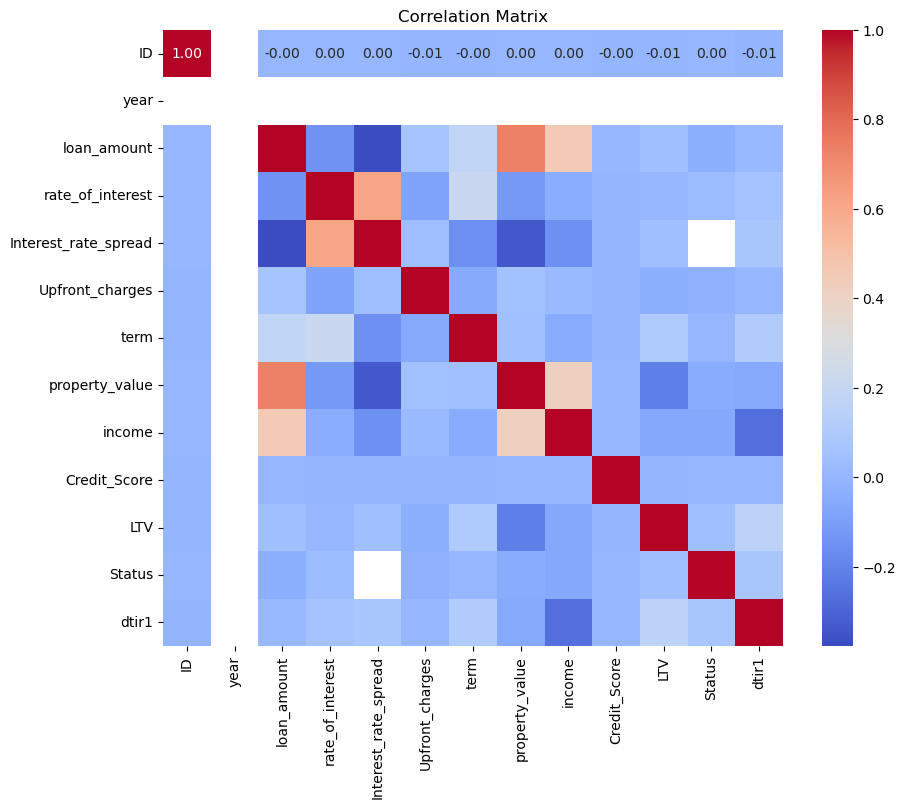

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [25]:
# Taux d'intérêts vs. default rate
df.groupby('rate_of_interest')['Status'].mean().sort_values(ascending=False)

rate_of_interest
4.865    1.000000
5.125    0.012238
5.000    0.010753
5.500    0.005736
4.875    0.004798
           ...   
3.350    0.000000
3.325    0.000000
3.300    0.000000
3.275    0.000000
8.000    0.000000
Name: Status, Length: 131, dtype: float64

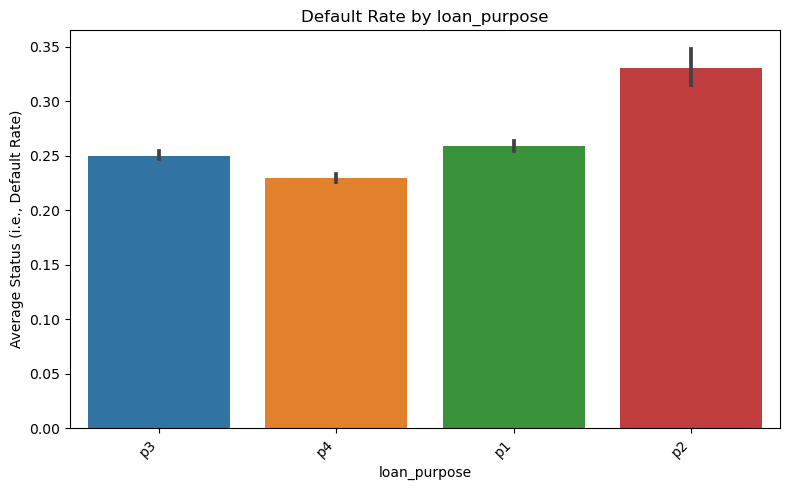

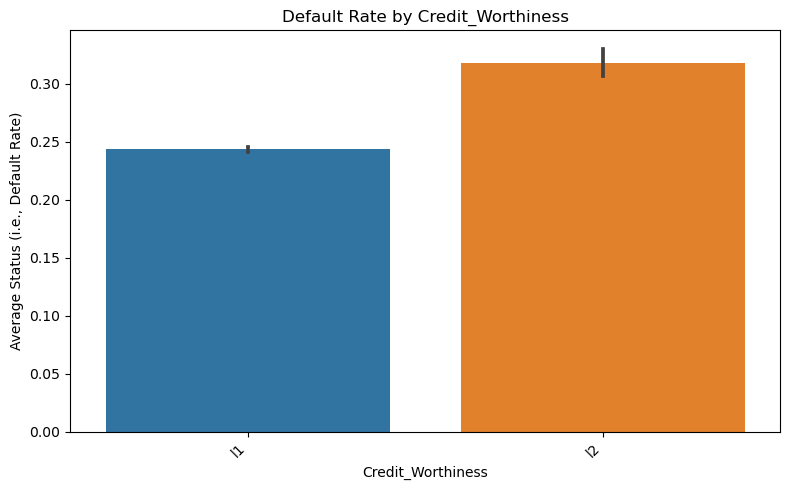

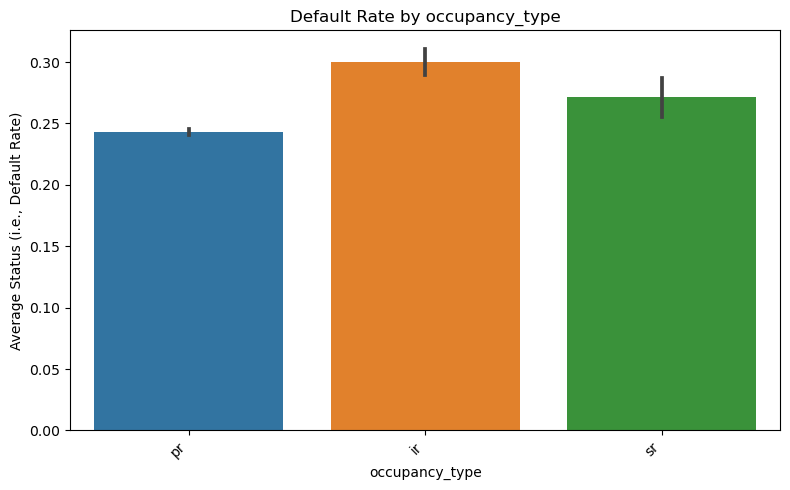

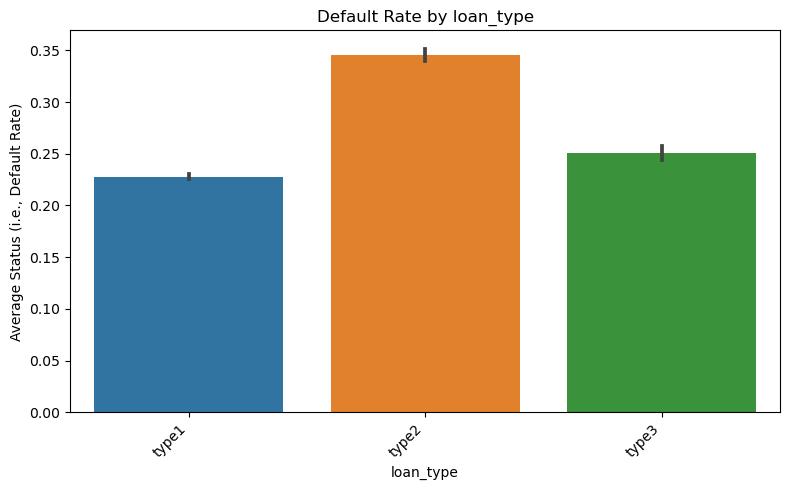

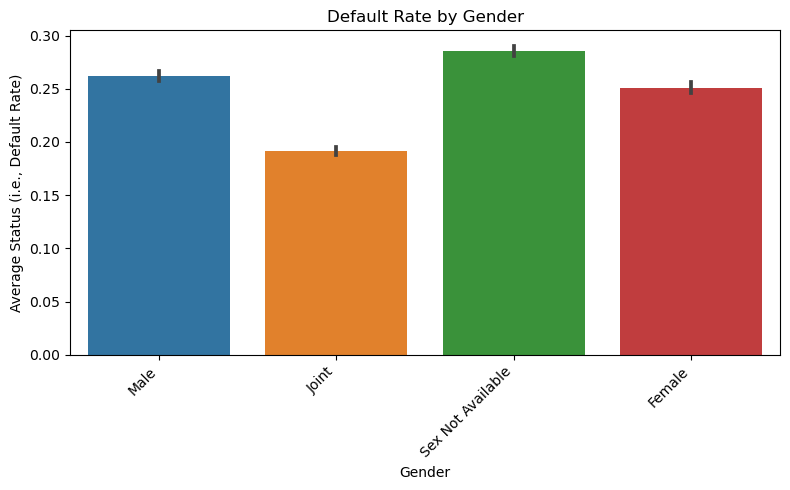

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_default_by_category(df, category_col):
    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=category_col,
        y='Status',
        data=df,
        order=df[category_col].value_counts().index
    )
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Default Rate by {category_col}')
    plt.ylabel('Average Status (i.e., Default Rate)')
    plt.tight_layout()
    plt.show()

# Loop through selected categorical columns
categorical_cols = [
    'loan_purpose',
    'Credit_Worthiness',
    'occupancy_type',
    'loan_type',
    'Gender'
]

for col in categorical_cols:
    plot_default_by_category(df, col)


In [32]:
df.isna().sum().sort_values(ascending=False)

Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
LTV                          15098
property_value               15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
submission_of_application      200
age                            200
loan_purpose                   134
Neg_ammortization              121
term                            41
Region                           0
total_units                      0
Security_Type                    0
Status                           0
co-applicant_credit_type         0
Credit_Score                     0
credit_type                      0
ID                               0
Secured_by                       0
occupancy_type                   0
construction_type                0
year                             0
interest_only                    0
loan_amount                      0
business_or_commerci

In [33]:
df.drop(columns=[
    'Upfront_charges',       # Trop de NaN
    'Interest_rate_spread',  # Trop de NaN
    'rate_of_interest',      # Redondante avec d'autres colonnes
    'ID',                    # Identifiant inutile pour l'analyse
    'year'                   # Constante ou sans importance ici
], inplace=True)


In [34]:
df['dtir1'] = df['dtir1'].fillna(df['dtir1'].median())
df['LTV'] = df['LTV'].fillna(df['LTV'].median())
df['property_value'] = df['property_value'].fillna(df['property_value'].median())
df['income'] = df['income'].fillna(df['income'].median())
df['term'] = df['term'].fillna(df['term'].median())


In [35]:
df['loan_limit'] = df['loan_limit'].fillna(df['loan_limit'].mode()[0])
df['approv_in_adv'] = df['approv_in_adv'].fillna(df['approv_in_adv'].mode()[0])
df['submission_of_application'] = df['submission_of_application'].fillna(df['submission_of_application'].mode()[0])
df['loan_purpose'] = df['loan_purpose'].fillna(df['loan_purpose'].mode()[0])
df['Neg_ammortization'] = df['Neg_ammortization'].fillna(df['Neg_ammortization'].mode()[0])
df['age'] = df['age'].fillna(df['age'].mode()[0])


In [36]:
df.isna().sum().sum()

0

In [37]:
df.to_csv("loan_default_cleaned.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'image/income_distribution.png'

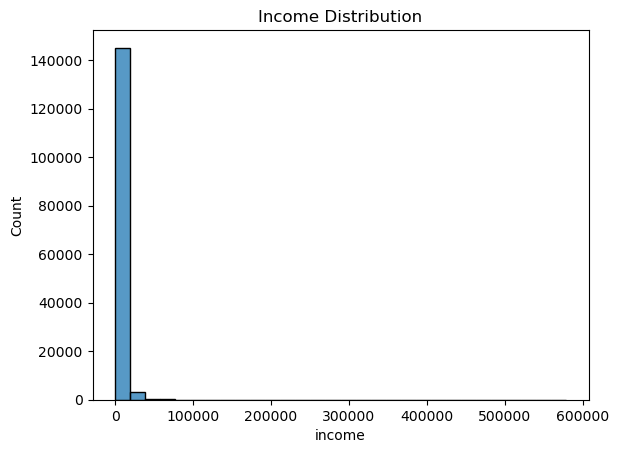

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example plot
sns.histplot(df['income'], bins=30)
plt.title("Income Distribution")

# Save image
plt.savefig("image/income_distribution.png", dpi=300, bbox_inches='tight')
plt.show()
